In [1]:
import numpy as np
import pandas as pd
import mdtraj as md
import glob
from natsort import natsorted
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('*.xtc')
files = natsorted(files)

temps = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

for file in files:
    xtc = md.load_xtc(file, top="a-syn.pdb")
    aa = md.compute_dssp(xtc)
    df = pd.DataFrame(aa)
    df.replace(to_replace=["C", "E"], value=0, inplace=True)
    df.replace("H", 1, inplace=True)
    bb = (df.sum()/len(df))
    bb = bb.to_list()
    temps.append(bb)

/Users/busayodanielalagbe/opt/anaconda3/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [3]:
df = pd.DataFrame(temps)
df = df.transpose()
df.to_csv('asyn.csv')

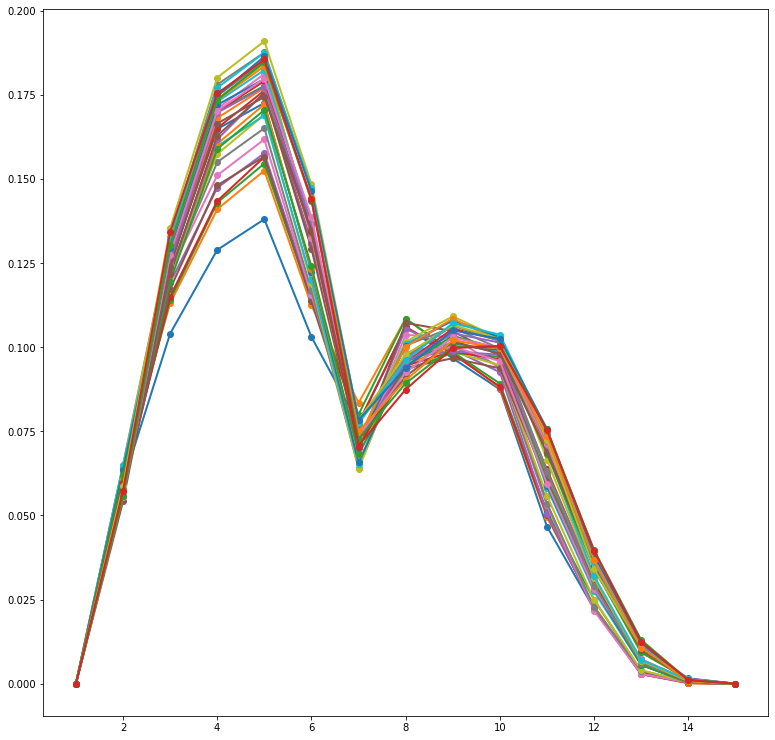

In [5]:
plt_1 = plt.figure(figsize=(13, 13))
for i in range(1,35):
    plt.plot(df[0], df[i], marker='o', markersize=6, linewidth=2)

In [6]:
df2 = df.copy()
df2 = df2.T
df2 = df2.iloc[1: , :]
temp = [277.15+i*3 for i in range(34)]

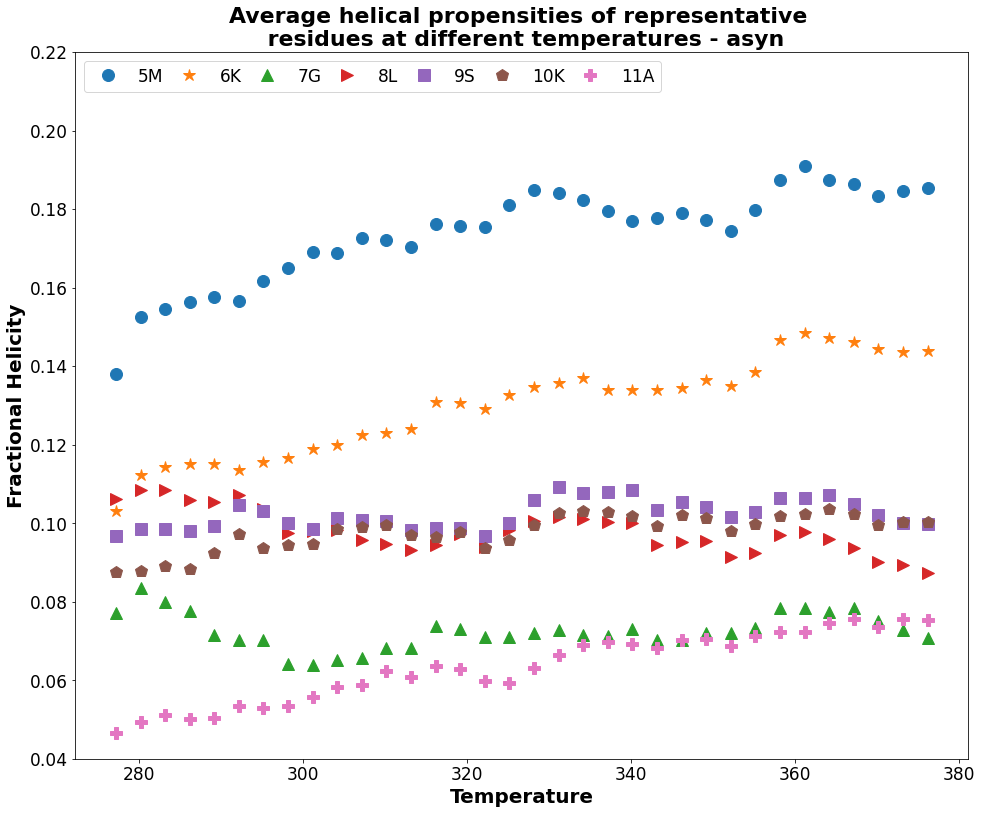

In [36]:
fig, ax = plt.subplots(figsize=(16, 13))
markers = ["o","*","^",">","s","p","P"]
for i in range(4,11):
    ax.plot(temp, df2[i], marker=markers[i-4], markersize=12,linestyle="")
    ax.set_xlabel("Temperature", fontsize=20, weight='bold')
    ax.set_ylabel("Fractional Helicity", fontsize=20, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=17)
    
plt.legend(('5M','6K','7G','8L','9S','10K','11A'),
                   loc='upper left', ncol=7, prop={"size":17}, columnspacing=0.5)
plt.title("Average helical propensities of representative \n residues at different temperatures - asyn",
          fontsize=22, weight='bold')
ax.set_ylim(0.04,0.22) 
plt.savefig('asyn', dpi=300)